In [30]:
import numpy as np
from models.linear import LinearRegression
from models.logistic import LogisticRegression
from metrics.classification_metrics import *
from models.onevsall import OVA
from models.svm import SVMClassificator
from models.decision_trees import DecisionTreeClassifier
from models.onevsone import OVO
from models.adaboost import AdaBoostClassifier
from sklearn.datasets import make_classification
from models.adaboost import AdaBoostRegressor
from metrics.regression_metrics import *
from models.decision_trees import DecisionTreeRegressor


In [31]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data # type: ignore
Y = iris.target # type: ignore

In [32]:
#n_samples = 500
#np.random.seed(42)

#classes = ["A", "B", "C", "D"]

#random_classes = np.random.choice(classes, size=n_samples)


#class_to_int = {label: idx for idx, label in enumerate(classes)}
#random_classes_int = np.vectorize(class_to_int.get)(random_classes)

In [33]:
#X = np.random.normal(2, 2, n_samples)
#Z = np.random.normal(9, 1, n_samples) 
#P = np.random.beta(1, 2, n_samples)

#Y = 2*X +  np.random.normal(0, 0.5, n_samples) + P + Z + random_classes_int * X 

#X= np.column_stack((X,X**2, Z + X, X * P, P, random_classes_int))

In [34]:
reg = LinearRegression(regularization="None").fit(X,Y)
ridge = LinearRegression(regularization="Ridge").fit(X,Y)
lasso = LinearRegression(regularization="Lasso", n_iter = 10000, lr=0.001).fit(X,Y)
elastic = LinearRegression(regularization="ElasticNet", n_iter = 10000, lr=0.001, alpha=0.4).fit(X,Y)

Converged at iteration 13, Δloss = 0.000086
Converged at iteration 12, Δloss = 0.000037


In [35]:
elastic_pred = elastic.predict(X)
print(elastic.print_errors(Y, elastic_pred), lasso.print_errors(Y, lasso.predict(X)), ridge.print_errors(Y, ridge.predict(X)))
elastic.score(X, Y), lasso.score(X, Y), ridge.score(X, Y)

╒══════════╤═════════╕
│ Metric   │   Value │
╞══════════╪═════════╡
│ MAE      │  0.335  │
├──────────┼─────────┤
│ RMSE     │  0.3713 │
├──────────┼─────────┤
│ MSE      │  0.1378 │
╘══════════╧═════════╛
╒══════════╤═════════╕
│ Metric   │   Value │
╞══════════╪═════════╡
│ MAE      │   0.201 │
├──────────┼─────────┤
│ RMSE     │   0.249 │
├──────────┼─────────┤
│ MSE      │   0.062 │
╘══════════╧═════════╛
╒══════════╤═════════╕
│ Metric   │   Value │
╞══════════╪═════════╡
│ MAE      │  0.1652 │
├──────────┼─────────┤
│ RMSE     │  0.2161 │
├──────────┼─────────┤
│ MSE      │  0.0467 │
╘══════════╧═════════╛
None None None


(np.float64(0.7932356265087651),
 np.float64(0.9070035948123093),
 np.float64(0.929974566172795))

In [36]:
reg.do_all(X, Y)

Model score:0.9303939218549563
R adjusted:0.906069897754173
Beta: [ 0.18649525 -0.11190585 -0.04007949  0.22864503  0.60925205]
Cross validation score: {'MAE': 0.1706, 'RMSE': 0.2201, 'MSE': 0.0489, 'R2': 0.924}
        The Ramsey RESET test for linearity
        Test Statistic : 21.3944 
        P-value        : 0.0 
        Interpretation : Model may be misspecified (nonlinearity exists) ❌ 
        
        Breusch-Pagan Test for Heteroscedasticity
        Test Statistic : 32.3809
        P-value        : 0.0
        Interpretation : Heteroscedasticity detected — variance of residuals is not constant. ❌
        
        Durbin-Watson Test for Independence of Errors
        DW Statistic  : 1.0767
        Interpretation: Possible positive autocorrelation ❌ 
        
        VIF Test for Multicollinearity
        Feature 1: VIF = 7.072722013939539 | Multicollinearity ❌
        Feature 2: VIF = 2.100871676124254 | No Multicollinearity ✅
        Feature 3: VIF = 31.26149777492164 | Multic

In [37]:
reg.Cooks_distance(X,Y)

array([7.87187450e-04, 2.29645347e-04, 2.68422712e-04, 1.92947423e-05,
       7.26535645e-04, 6.19417900e-04, 2.10323282e-04, 2.06176155e-04,
       6.41381761e-05, 8.41947608e-04, 1.63271521e-03, 8.05991834e-08,
       1.07920432e-03, 1.80193118e-03, 1.93374830e-02, 7.02795700e-04,
       2.81392339e-04, 5.73183908e-05, 2.13786604e-04, 1.92066328e-05,
       2.54745230e-04, 4.27117929e-04, 2.56091470e-03, 3.73359977e-03,
       1.14319246e-03, 3.97697686e-06, 1.02111783e-03, 5.92175675e-04,
       1.04229000e-03, 5.10224146e-05, 1.79561621e-05, 2.22972687e-04,
       8.76278451e-03, 7.58813470e-03, 4.96724891e-05, 1.81407963e-03,
       5.39134187e-03, 2.59246738e-03, 7.64680858e-06, 3.29861506e-04,
       1.45449586e-04, 2.45173628e-03, 3.63587932e-05, 8.34823588e-03,
       4.12251420e-03, 1.50972241e-04, 4.85811034e-04, 2.63365136e-05,
       1.20633065e-03, 4.32373981e-04, 8.37998537e-03, 4.80632057e-03,
       1.56820233e-02, 5.90939340e-03, 1.09370604e-02, 1.06350355e-02,
      

In [38]:



#X= np.column_stack((Z, X))

#Y = random_classes_int

from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [39]:
import pandas as pd

#X = pd.DataFrame(X, columns=["1","2","3","4","5"])

In [40]:

log = LogisticRegression(
                         regularization="None", 
                         solver="LBFGS",
                         l2_ratio=0.5,
                         l1_ratio= 0.9,
                         lr=0.2, 
                         n_iter = 100,
                         random_state = 0)
log.fit(X, Y)

Converged at iteration 98, Δloss = 0.000092


0.98


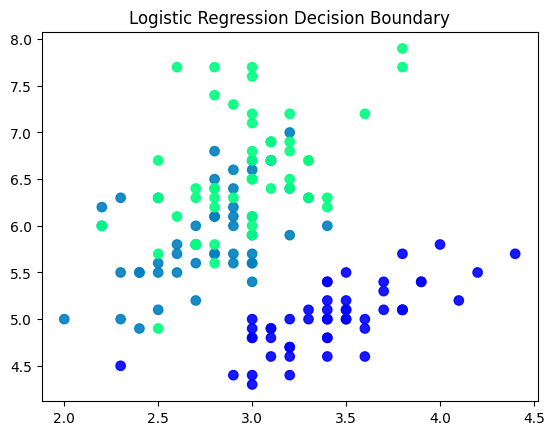

In [41]:
pred = log.predict(X)

print(balanced_accuracy(Y, pred))
log.plot(1,0)

In [42]:
log.theta

array([-0.3859424 ,  1.30502389, -1.15616675,  1.97745221,  1.44819824,
       -1.04946974,  1.94967645, -0.28620951, -1.60665252, -3.33353555,
       -0.43690016,  2.92463612, -0.62348388, -0.63258891,  2.55637924])

Svm model should be used with two classes, use One vs All approach for multicalss problems.
0.6666666666666666


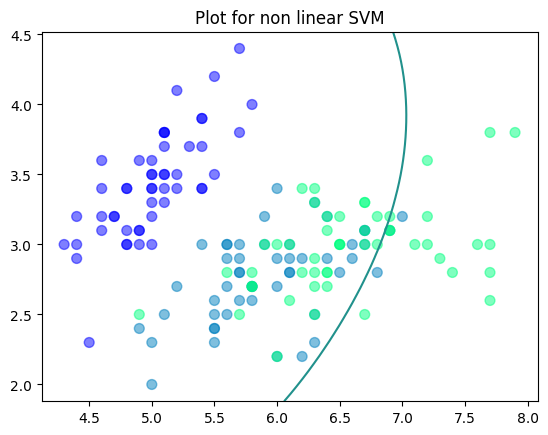

In [43]:
svm = SVMClassificator(kernel="rbf", n_iter=100, lr=0.01 , C=1, r=1, gamma=0.4).fit(X,Y)
svm.predict(X)
print(balanced_accuracy(Y, svm.predict(X)))
svm.plot(0,1)

In [44]:

tree_class = DecisionTreeClassifier(max_depth=5)
sample_weight = np.ones(len(Y)) * 0.1

tree_class.fit(X, Y, 
         #sample_weight=sample_weight
         )


print(balanced_accuracy(Y, tree_class.predict(X)))
print(confusion_matrix(Y, tree_class.predict(X)))

0.98
[[50.  0.  0.]
 [ 0. 49.  1.]
 [ 0.  2. 48.]]


In [45]:
log = LogisticRegression(
                         X.shape[1], 
                         len(np.unique(Y)), 
                         verbose=False,
                         random_state=1,
                         solver="LBFGS"
                         )

log.fit(X, Y, 
         sample_weight=sample_weight
         )

print(balanced_accuracy(Y, log.predict(X)))
print(confusion_matrix(Y, log.predict(X)))

0.37333333333333335
[[ 0. 50.  0.]
 [ 0.  6. 44.]
 [ 0.  0. 50.]]


In [46]:


X_lol, y_bin = make_classification(n_samples=200, n_features=5)
y_bin = (y_bin == 1).astype(int)  

log = LogisticRegression(
                         verbose=False, 
                         solver="Lion", 
                         lr=0.001,
                         n_iter=1000,
                         random_state=1,
                         tol=1e-12
                         )
ada = AdaBoostClassifier(log, n_estimators=10, verbose=False)
ada.fit(X_lol, y_bin)
print(balanced_accuracy(y_bin, ada.predict(X_lol)))
print(confusion_matrix(y_bin, ada.predict(X_lol)))

ada = AdaBoostClassifier(tree_class, n_estimators=4)
ada.fit(X_lol, y_bin)
print(balanced_accuracy(y_bin, ada.predict(X_lol)))
print(confusion_matrix(y_bin, ada.predict(X_lol)))

0.905
[[92.  8.]
 [11. 89.]]
⚠️ Estimator 2: weak learner has error 0.5000 (≥ 0.5). Skipping.
⚠️ Estimator 3: weak learner has error 0.5000 (≥ 0.5). Skipping.
0.965
[[98.  2.]
 [ 5. 95.]]


In [47]:


tree_reg = DecisionTreeRegressor(max_depth = 2)


ada_reg = AdaBoostRegressor(
    tree_reg,
    n_estimators=20,
    verbose=False
)

ada_reg.fit(X_lol, y_bin)

print(MSE(y_bin, ada_reg.predict(X_lol)))
print(MAE(y_bin, ada_reg.predict(X_lol)))
print(RMSE(y_bin, ada_reg.predict(X_lol)))


0.11877348719375246
0.24109226182103163
0.3446352959198353


In [48]:
ada_log = AdaBoostClassifier(log, n_estimators=4)
ada_tree = AdaBoostClassifier(tree_class, n_estimators=20, verbose=False)

ova = OVA(
    ada_tree
)

ova.fit(X, Y)
preds = ova.predict(X)
print(balanced_accuracy(Y, preds))
print(confusion_matrix(Y, preds))

0.98
[[50.  0.  0.]
 [ 0. 49.  1.]
 [ 0.  2. 48.]]


In [49]:
from models.svm import SVMClassificator, SVMRegressor

svm_class = SVMClassificator(
lr=0.001,
kernel="rbf",
n_iter=400,
tolerance=1e-8
)
ova_svm = OVA(
    svm_class
)

ova_svm.fit(X,Y)
preds = ova_svm.predict(X)

print(balanced_accuracy(Y, preds))
print(confusion_matrix(Y, preds))



0.98
[[50.  0.  0.]
 [ 0. 47.  3.]
 [ 0.  0. 50.]]


In [50]:
svm_reg = SVMRegressor(
    kernel="rbf"
)
svm_reg.fit(X, Y)


print(MSE(Y, svm_reg.predict(X)))
print(MAE(Y, svm_reg.predict(X)))
print(RMSE(Y, svm_reg.predict(X)))

0.06051714853320879
0.20588807372370718
0.2460023344060149


In [51]:

tree = DecisionTreeRegressor(max_depth = 5)
tree.fit(X, Y)


print(MSE(Y, tree.predict(X)))
print(MAE(Y, tree.predict(X)))
print(RMSE(Y, tree.predict(X)))


0.012222222222222285
0.02444444497426351
0.11055415967851362


In [52]:
from models.votingclassifier import VotingClassifier

votes = VotingClassifier(
    estimators = [
        DecisionTreeClassifier(max_depth = 5),
        LogisticRegression( 
                         regularization="elastic_net", 
                         solver="ADABelief",
                         l2_ratio=0.5,
                         l1_ratio= 0.9,
                         lr=1, 
                         n_iter = 1000,
                         random_state = 0),
        LogisticRegression( 
                         regularization="l1", 
                         solver="ADABelief",
                         #l2_ratio=0.5,
                         l1_ratio= 0.09,
                         lr=1, 
                         n_iter = 1000,
                         random_state = 2,
                         verbose=False),
        LogisticRegression( 
                         regularization="elastic_net", 
                         solver="Lion",
                         l2_ratio=0.5,
                         l1_ratio= 0.9,
                         lr=0.01, 
                         n_iter = 1000,
                         random_state = 2),
        #ova_svm
        ],
        soft_votting = True 
)

votes.fit(X, Y)
preds = votes.predict(X)
print(balanced_accuracy(Y, preds))
print(confusion_matrix(Y, preds))

Converged at iteration 436, Δloss = 0.000024
Converged at iteration 233, Δloss = 0.000073
0.98
[[50.  0.  0.]
 [ 0. 50.  0.]
 [ 0.  3. 47.]]


In [53]:
from models.bagging import BaggingClassifier

bagging = BaggingClassifier(
    LogisticRegression( 
    #max_depth = 5,
    solver="LBFGS"
    ),
    replacement=False,
    n_splits = 2,
    soft_voting = True


)

bagging.fit(X, Y)
preds = bagging.predict(X)
print(balanced_accuracy(Y, preds))
print(confusion_matrix(Y, preds))


Converged at iteration 27, Δloss = 0.000052
Converged at iteration 24, Δloss = 0.000049
0.9733333333333333
[[50.  0.  0.]
 [ 0. 46.  4.]
 [ 0.  0. 50.]]


In [54]:
from models.gradientboosting import GradientBoostingRegressor




tree = GradientBoostingRegressor(DecisionTreeClassifier(), n_estimators=9)
tree.fit(X, Y)


print(MSE(Y, tree.predict(X)))
print(MAE(Y, tree.predict(X)))
print(RMSE(Y, tree.predict(X)))

0.11389685277601946
0.27053191622000006
0.33748607789954754


In [55]:
from models.gradientboosting import GradientBoostingClassifier

grad = GradientBoostingClassifier(
    DecisionTreeClassifier(max_depth = 12),
    n_estimators = 5,
    lr=1
    )

grad.fit(X, Y)
preds = grad.predict(X)
print(balanced_accuracy(Y, preds))
print(confusion_matrix(Y, preds))

0.3333333333333333
[[ 0. 50.  0.]
 [ 0. 50.  0.]
 [ 0. 50.  0.]]


In [56]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
ada.predict_proba(X)

array([[0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.965, 0.035],
       [0.9